In [ ]:
# I am building the my webscrape off of this person's excellent documentation with 
# some slight modifcations. 
# https://towardsdatascience.com/web-scraping-craigslist-a-complete-tutorial-c41cea4f4981

In [183]:
#import get to call a get request on the site
import requests

#import to manipulate arrays with numpy
import numpy as np

#import to create, clean, and parse data frames with pandas
import pandas as pd

#import to enable datascraping
from bs4 import BeautifulSoup

#import to set up 'sleep' to wait between page loads
import time

#import to make that html 'soviet-code' readable
import pprint

# ?
import re

#import to get the universe in balance
import random

# ?
from scipy.stats import binom

# ?
import seaborn as sns

# Because we need to plot and make it pretty
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#get the first page of the Austin motorcycle prices
#I also messed with the url to bundle duplicates and assign the url to land on front page 
response = requests.get('https://austin.craigslist.org/search/mca?s=0&bundleDuplicates=1')

In [ ]:
# 

In [3]:
html_soup = BeautifulSoup(response.text, 'html.parser')

posts = html_soup.find_all('li', class_= 'result-row')
print(type(posts)) #to double check that I got a ResultSet
print(len(posts)) #to double check I got 120 (elements/page)

<class 'bs4.element.ResultSet'>
127


In [4]:
# All my datatypes are bs4 which is what I want
# I got 127. I'm not sure how, but I would be more concerned if it were less than 120

In [5]:
# Now to get a quick check on what's inside our response
pprint.pprint(response.text)

('\ufeff<!DOCTYPE html>\n'
 '<html class="no-js"><head>\n'
 '    <title>austin motorcycles/scooters  - craigslist</title>\n'
 '\n'
 '    <meta name="description" content="austin motorcycles/scooters  - '
 'craigslist">\n'
 '    <meta http-equiv="X-UA-Compatible" content="IE=Edge"/>\n'
 '    <link rel="canonical" href="https://austin.craigslist.org/search/mca">\n'
 '    <link rel="alternate" type="application/rss+xml" '
 'href="https://austin.craigslist.org/search/mca?bundleDuplicates=1&amp;format=rss" '
 'title="RSS feed for craigslist | austin motorcycles/scooters  - '
 'craigslist">\n'
 '        <link rel="next" '
 'href="https://austin.craigslist.org/search/mca?s=120&amp;bundleDuplicates=1">\n'
 '    <meta name="viewport" content="width=device-width,initial-scale=1">\n'
 '    <link type="text/css" rel="stylesheet" media="all" '
 'href="//www.craigslist.org/styles/cl.css?v=784f71fcd82733e2b32e8d3284beaf58">\n'
 '    <link type="text/css" rel="stylesheet" media="all" '
 'href="//www.c

 '                <span class="result-tags">\n'
 '                    <span class="pictag">pic</span>\n'
 '                </span>\n'
 '\n'
 '                <span class="banish icon icon-trash collapsed-trash" '
 'role="button">\n'
 '                    <span class="screen-reader-text">hide this '
 'posting</span>\n'
 '                </span>\n'
 '\n'
 '            <span class="unbanish icon icon-trash red" role="button" '
 'aria-hidden="true"></span>\n'
 '            <a href="#" class="restore-link">\n'
 '                <span class="restore-narrow-text">restore</span>\n'
 '                <span class="restore-wide-text">restore this posting</span>\n'
 '            </a>\n'
 '\n'
 '        </span>\n'
 '    </p>\n'
 '</li>\n'
 '         <li class="result-row" data-pid="7103597656" '
 'data-repost-of="7084642511">\n'
 '\n'
 '        <a '
 'href="https://austin.craigslist.org/mcy/d/spicewood-2004-bmw-r1150r-rockster/7103597656.html" '
 'class="result-image gallery" '
 'data-ids="1:01313_

 '         <li class="result-row duplicate-row" data-pid="7103444239" '
 'data-repost-of="7087162801">\n'
 '\n'
 '        <a '
 'href="https://austin.craigslist.org/mcy/d/2016-ktm300sx/7103444239.html" '
 'class="result-image gallery" '
 'data-ids="1:00U0U_iKv9Eb6NUl3,1:00k0k_jTDFmyNgQKL,1:01414_kvOmYQ3NOvl,1:00202_604GILcvZ39,1:00S0S_gwj04CqWYcw">\n'
 '                <span class="result-price">$4000</span>\n'
 '        </a>\n'
 '\n'
 '    <p class="result-info">\n'
 '        <span class="icon icon-star" role="button">\n'
 '            <span class="screen-reader-text">favorite this post</span>\n'
 '        </span>\n'
 '\n'
 '            <time class="result-date" datetime="2020-04-04 12:37" title="Sat '
 '04 Apr 12:37:22 PM">Apr  4</time>\n'
 '\n'
 '\n'
 '        <a '
 'href="https://austin.craigslist.org/mcy/d/2016-ktm300sx/7103444239.html" '
 'data-id="7103444239" class="result-title hdrlnk">2016 ktm300sx</a>\n'
 '\n'
 '\n'
 '        <span class="result-meta">\n'
 '                <s

 '                <span class="result-tags">\n'
 '                    <span class="pictag">pic</span>\n'
 '                </span>\n'
 '\n'
 '                <span class="banish icon icon-trash collapsed-trash" '
 'role="button">\n'
 '                    <span class="screen-reader-text">hide this '
 'posting</span>\n'
 '                </span>\n'
 '\n'
 '            <span class="unbanish icon icon-trash red" role="button" '
 'aria-hidden="true"></span>\n'
 '            <a href="#" class="restore-link">\n'
 '                <span class="restore-narrow-text">restore</span>\n'
 '                <span class="restore-wide-text">restore this posting</span>\n'
 '            </a>\n'
 '\n'
 '        </span>\n'
 '    </p>\n'
 '</li>\n'
 '         <li class="result-row" data-pid="7102937389">\n'
 '\n'
 '        <a '
 'href="https://austin.craigslist.org/mcd/d/boerne-2020-indian-scout-bobber-abs/7102937389.html" '
 'class="result-image gallery" '
 'data-ids="1:01313_gVALmnMHy9n,1:01515_hFi7zPdUXaF

 '\n'
 '                <span class="banish icon icon-trash collapsed-trash" '
 'role="button">\n'
 '                    <span class="screen-reader-text">hide this '
 'posting</span>\n'
 '                </span>\n'
 '\n'
 '            <span class="unbanish icon icon-trash red" role="button" '
 'aria-hidden="true"></span>\n'
 '            <a href="#" class="restore-link">\n'
 '                <span class="restore-narrow-text">restore</span>\n'
 '                <span class="restore-wide-text">restore this posting</span>\n'
 '            </a>\n'
 '\n'
 '                <a class="expand first" href="#">[<span '
 'class="expand-toggle">1</span> more like this]</a>\n'
 '        </span>\n'
 '    </p>\n'
 '        <ul class="duplicate-rows">\n'
 '         <li class="result-row" data-pid="7096236869">\n'
 '\n'
 '        <a '
 'href="https://austin.craigslist.org/mcd/d/round-rock-2016-bmw-1600-gt-premium/7096236869.html" '
 'class="result-image gallery" data-ids="1:00J0J_3tReHuzyJlP">\n'
 '    

In [6]:
# Now to check what is in that first index and see the information I want to parse out
post_one = posts[0]
post_one

<li class="result-row" data-pid="7104304304">
<a class="result-image gallery" data-ids="1:00909_enONTihvKbW,1:00P0P_a8du1mw8MDs,1:00G0G_eTX9iHjmQcb,1:00x0x_5x2XNtSstUV,1:00z0z_4IcFT2LZXSV,1:01313_feqRMA4znDS,1:00v0v_5klBsDBYhz2,1:01313_iswRHdKSU8a,1:00T0T_fmx3xABgYlJ,1:00C0C_ccYs1BgrPcO,1:00d0d_a1bfSGmyxF2" href="https://austin.craigslist.org/mcy/d/austin-5th-gen-vfr-58k-miles/7104304304.html">
<span class="result-price">$1000</span>
</a>
<p class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</span>
</span>
<time class="result-date" datetime="2020-04-06 12:17" title="Mon 06 Apr 12:17:12 PM">Apr  6</time>
<a class="result-title hdrlnk" data-id="7104304304" href="https://austin.craigslist.org/mcy/d/austin-5th-gen-vfr-58k-miles/7104304304.html">5th Gen VFR, 58k miles</a>
<span class="result-meta">
<span class="result-price">$1000</span>
<span class="result-hood"> (Highland)</span>
<span class="result-tags">
<span class="pict

In [7]:
#grab the title of the first post
post_one_title = post_one.find_all('a', class_='result-title hdrlnk')
post_one_title

[<a class="result-title hdrlnk" data-id="7104304304" href="https://austin.craigslist.org/mcy/d/austin-5th-gen-vfr-58k-miles/7104304304.html">5th Gen VFR, 58k miles</a>]

In [8]:
#grab the price of the first post
post_one_price = post_one.a.text
post_one_price.strip()

'$1000'

In [9]:
#grab the neighborhood it is posted in
post_one_hood = post_one.find('span', class_= 'result-hood')
post_one_hood

<span class="result-hood"> (Highland)</span>

In [10]:
#grab the time and datetime it was posted
post_one_time = post_one.find('time', class_= 'result-date')
post_one_datetime = post_one_time['datetime']
post_one_datetime

'2020-04-06 12:17'

In [258]:
#find the total number of posts to find the limit for each page
results_num = html_soup.find('div', class_= 'search-legend')
#pulled the total count of posts as the upper bound of the pages array
results_total = int(results_num.find('span', class_='totalcount').text) 
#each page has 119 posts so each new page is defined as follows: s=120, s=240, s=360, and so on. So we need to step in size 120 in the np.arange function
pages = np.arange(0, results_total+1, 120)

iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
post_links = []
post_prices = []

for page in pages:
    
    #get request
    response = requests.get("https://austin.craigslist.org/search/mca?" 
                   + "s=" #the parameter for defining the page number 
                   + str(page) #the page number in the pages array from earlier
                   + "&bundleDuplicates=1")

    time.sleep(random.randint(4,8))
     
    #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
    #define the html text
    page_html = BeautifulSoup(response.text, 'html.parser')
    
    #define the posts
    posts = html_soup.find_all('li', class_= 'result-row')
        
    #extract data item-wise
    for post in posts:

        if post.find('span', class_ = 'result-hood') is not None:

            #posting date
            #grab the datetime element 0 for date and 1 for time
            post_datetime = post.find('time', class_= 'result-date')['datetime']
            post_timing.append(post_datetime)

            #neighborhoods
            post_hood = post.find('span', class_= 'result-hood').text
            post_hoods.append(post_hood)

            #title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text
            post_title_texts.append(post_title_text)

            #post link
            post_link = post_title['href']
            post_links.append(post_link)
            
            #removes the \n whitespace from each side, removes the currency symbol, and turns it into an int
            post_price = (post.a.text.strip().replace("$", "")) 
            post_prices.append(post_price)
            

    iterations += 1
    print("Page " + str(iterations) + " scraped successfully!")

print("\n")

print("Scrape complete!")

Page 1 scraped successfully!
Page 2 scraped successfully!
Page 3 scraped successfully!
Page 4 scraped successfully!
Page 5 scraped successfully!


Scrape complete!


In [20]:
# First scrape is complete. Let's see what our possible success looks like

post_timing[0:5], post_hoods[0:5], post_title_texts[0:5], post_links[0:5], post_prices[0:5]


(['2020-04-06 12:17',
  '2020-04-06 11:37',
  '2020-04-06 11:30',
  '2020-04-06 11:02',
  '2020-04-06 10:54'],
 [' (Highland)',
  ' (Austin)',
  ' (Cedar park)',
  ' (Marble Falls)',
  ' (NW Austin)'],
 ['5th Gen VFR, 58k miles',
  '2008 Harley Davidson Nightster XL1200N',
  'Harley 2012 dyna',
  '2013 KX450F',
  '2013 BMW RT 90th Anniversary Edition'],
 ['https://austin.craigslist.org/mcy/d/austin-5th-gen-vfr-58k-miles/7104304304.html',
  'https://austin.craigslist.org/mcy/d/austin-2008-harley-davidson-nightster/7104278470.html',
  'https://austin.craigslist.org/mcy/d/cedar-park-harley-2012-dyna/7104273689.html',
  'https://austin.craigslist.org/mcy/d/marble-falls-2013-kx450f/7104255675.html',
  'https://austin.craigslist.org/mcy/d/austin-2013-bmw-rt-90th-anniversary/7104250349.html'],
 ['1000', '5000', '8500', '4000', '10400'])

In [21]:
# LOOKIN' GUD!
# Now let's validate the length for each of these
len(post_timing), len(post_hoods), len(post_title_texts), len(post_links), len(post_prices)

(605, 605, 605, 605, 605)

In [22]:
#There are 570. It seems each page is generating 7 more fills than it should be, but I'm
# good with this for now. When I cast this bad boy into a dataframe, I'll get a better syntax
# for what's happening. If its not too big an issue then I'll work with what I got, and if I 
# have time then I'll go back and fix the scrape code later. If not, then I'll decide something else.

In [213]:
# I'm casting our arrays to a pandas data frame.
a_moto = pd.DataFrame({'posted': post_timing,
                       'neighborhood': post_hoods,
                       'post title': post_title_texts,
                       'URL': post_links,
                       'price': post_prices})
print(a_moto.info())
a_moto.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   posted        605 non-null    object
 1   neighborhood  605 non-null    object
 2   post title    605 non-null    object
 3   URL           605 non-null    object
 4   price         605 non-null    object
dtypes: object(5)
memory usage: 23.8+ KB
None


,posted,neighborhood,post title,URL,price
0,2020-04-06 12:17,(Highland),"5th Gen VFR, 58k miles",https://austin.craigslist.org/mcy/d/austin-5th...,1000
1,2020-04-06 11:37,(Austin),2008 Harley Davidson Nightster XL1200N,https://austin.craigslist.org/mcy/d/austin-200...,5000
2,2020-04-06 11:30,(Cedar park),Harley 2012 dyna,https://austin.craigslist.org/mcy/d/cedar-park...,8500
3,2020-04-06 11:02,(Marble Falls),2013 KX450F,https://austin.craigslist.org/mcy/d/marble-fal...,4000
4,2020-04-06 10:54,(NW Austin),2013 BMW RT 90th Anniversary Edition,https://austin.craigslist.org/mcy/d/austin-201...,10400
5,2020-04-06 08:13,"(Austin, TX)",2016 Aprilia® RSV4 RF Factory,https://austin.craigslist.org/mcd/d/austin-201...,12450
6,2020-04-06 08:13,"(Austin, TX)",2018 Honda® CB1000R ABS,https://austin.craigslist.org/mcd/d/austin-201...,10990
7,2020-04-06 08:13,"(Austin, TX)",2019 Kawasaki Z900RS ABS,https://austin.craigslist.org/mcd/d/austin-201...,8980
8,2020-04-06 08:00,"(Round Rock, TX)",2007 Harley-Davidson® FLHRSE3 - Road King® Scr...,https://austin.craigslist.org/mcd/d/round-rock...,10750
9,2020-04-06 08:00,"(Round Rock, TX)",2017 Harley-Davidson® FLHX - Street Glide®,https://austin.craigslist.org/mcd/d/round-rock...,13992


In [127]:
# Let's take a look at what's happening under the hood here
a_moto.describe()

,posted,neighborhood,post title,URL,price
count,605,605,605,605,605
unique,90,45,112,121,100
top,2020-04-03 08:01,"(Round Rock, TX)",2016 ktm300sx,https://austin.craigslist.org/mcd/d/boerne-202...,4000
freq,35,145,15,5,30


In [90]:
# 121 unique values stands out for 605
a_moto.sort_values('post title')

,posted,neighborhood,post title,URL,price
524,2020-04-04 10:10,(Llano Texas),1956 Cushman Iron Eagle Scooter,https://austin.craigslist.org/mcy/d/llano-1956...,3450
40,2020-04-04 10:10,(Llano Texas),1956 Cushman Iron Eagle Scooter,https://austin.craigslist.org/mcy/d/llano-1956...,3450
403,2020-04-04 10:10,(Llano Texas),1956 Cushman Iron Eagle Scooter,https://austin.craigslist.org/mcy/d/llano-1956...,3450
161,2020-04-04 10:10,(Llano Texas),1956 Cushman Iron Eagle Scooter,https://austin.craigslist.org/mcy/d/llano-1956...,3450
282,2020-04-04 10:10,(Llano Texas),1956 Cushman Iron Eagle Scooter,https://austin.craigslist.org/mcy/d/llano-1956...,3450
...,...,...,...,...,...
586,2020-04-02 08:48,(north austin),Wheelchair battery powered,https://austin.craigslist.org/mcy/d/austin-whe...,5500
223,2020-04-02 08:48,(north austin),Wheelchair battery powered,https://austin.craigslist.org/mcy/d/austin-whe...,5500
465,2020-04-02 08:48,(north austin),Wheelchair battery powered,https://austin.craigslist.org/mcy/d/austin-whe...,5500
102,2020-04-02 08:48,(north austin),Wheelchair battery powered,https://austin.craigslist.org/mcy/d/austin-whe...,5500


In [97]:
#It seems there are multiple reposts for each title. Let's cut these down and make them
# more manageable.

a_moto1 = a_moto.drop_duplicates()
a_moto1

,posted,neighborhood,post title,URL,price
0,2020-04-06 12:17,(Highland),"5th Gen VFR, 58k miles",https://austin.craigslist.org/mcy/d/austin-5th...,1000
1,2020-04-06 11:37,(Austin),2008 Harley Davidson Nightster XL1200N,https://austin.craigslist.org/mcy/d/austin-200...,5000
2,2020-04-06 11:30,(Cedar park),Harley 2012 dyna,https://austin.craigslist.org/mcy/d/cedar-park...,8500
3,2020-04-06 11:02,(Marble Falls),2013 KX450F,https://austin.craigslist.org/mcy/d/marble-fal...,4000
4,2020-04-06 10:54,(NW Austin),2013 BMW RT 90th Anniversary Edition,https://austin.craigslist.org/mcy/d/austin-201...,10400
...,...,...,...,...,...
116,2020-04-01 21:30,"(Round Rock, TX)",2019 Indian Motorcycle® Springfield® Dark Hors...,https://austin.craigslist.org/mcd/d/round-rock...,17981
117,2020-04-01 21:30,"(Round Rock, TX)",2016 BMW K 1600 GT Premium,https://austin.craigslist.org/mcd/d/round-rock...,13991
118,2020-04-01 21:20,"(Round Rock, TX)",2015 KTM 1290 Super Adventure,https://austin.craigslist.org/mcd/d/round-rock...,8998
119,2020-04-01 21:00,"(Round Rock, TX)",2018 Harley-Davidson® FLHX - Street Glide®,https://austin.craigslist.org/mcd/d/round-rock...,17389


In [98]:
# 121 rows is much smaller than our original 605, but it makes sense. Let's explore further.
# We're first interested in price. When we scraped the page, our 
# price array scraped strings. We need those strings to be integers before we can do anything.
# So I'm running the below to conver them to strings.
price = a_moto1['price']
for i in price:
    int(i)
price_mean = np.mean(price)

ValueError: invalid literal for int() with base 10: ''

In [99]:
# I got an interesting error here. It seems I can't convert some of the values to strings. I'm
# using the following code to check what's happening.
for i in price:
    print(i)

1000
5000
8500
4000
10400
12450
10990
8980
10750
13992
8250
3999
1000
1650
1650
10480
5180
10981
7380
14950
13880
6850
7995
7500
13999
3250
5500
4000
12995
10995
9995

1500
2500
4000
4000
4000
22880
3950
14450
3450
10500
5995
5980
19980
7380
10380
12780
9950
4980
4000
4650
6700
7388
5388
4788
10000
8788
8388
8788
4988
6788
6788
7388
5288
1700
2399
2199
1999
3899
11995
27999
16000
12399
17900
9200
5980
6990
16980
6980
16950
9999
7480
19499
21980
6893
12699
13999
13999
10999
10999
8000
2900
1500
2500
4800
699
699
2000
13995
9985
20999
5500
6250
7880
9980
13990
6333
3500
12933
5900
5900
7200
7200
2493
26999
17981
13991
8998
17389
4900


In [164]:
# #It seems we have an empty value. Parsing through and seeing what we had worked for 121 rows,
# but we'll have to come up with a better way. If I have time I'll make a function that parses
# through a whole set to filter out for more common data problems. In the meantime let's get
# rid of that empty value and any others I may have missed.

for idx, i in enumerate(price):
    if i == '':
        a_moto2 = a_moto1.drop(idx)
a_moto2.describe()

,posted,neighborhood,post title,URL,price
count,120,120,120,120,120
unique,89,44,111,120,99
top,2020-04-03 08:01,"(Round Rock, TX)",2016 BMW K 1600 GT Premium,https://austin.craigslist.org/mcd/d/boerne-202...,4000
freq,7,29,3,1,6


In [130]:
# Converting price to integers
price = a_moto2['price']
price = list(map(int, price))

In [115]:
# And now to check if that worked and pull some numbers we can infer something from
price_mean = np.mean(price)
price_sd = np.std(price)
price_min = np.min(price)
price_max = np.max(price)
price_mean, price_sd, price_min, price_max

(8673.525, 5570.435769851553, 699, 27999)

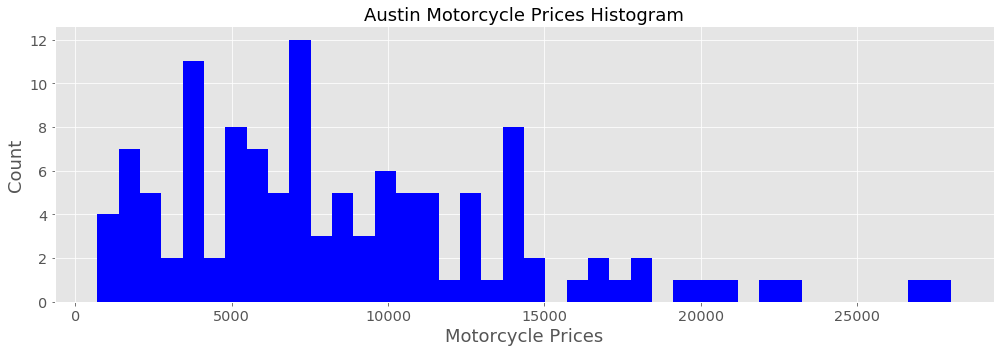

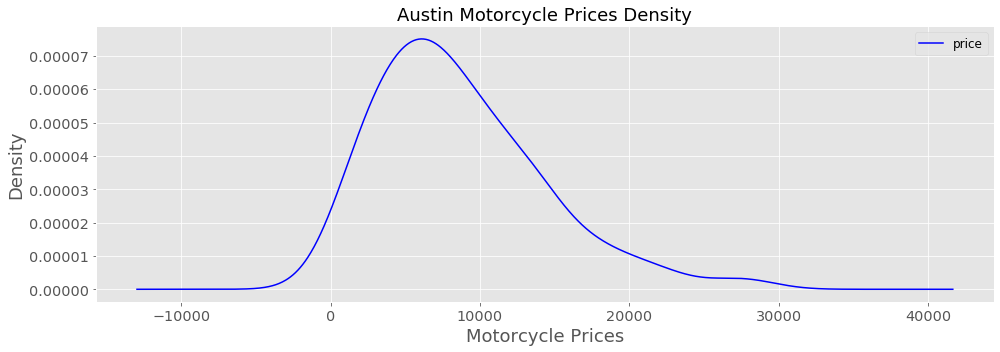

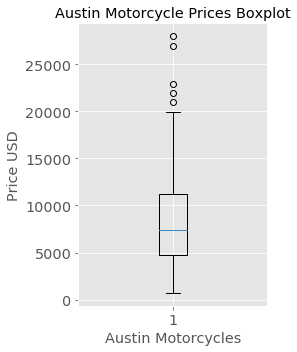

In [204]:
# Let's build some plots and view our price data with a different perspective
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (14, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(price, color = 'blue', bins = 40)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Austin Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

price=a_moto2['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Austin Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (4, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
price_boxplot = price.array
plt.boxplot(price_boxplot)
plt.xlabel("Austin Motorcycles")
plt.ylabel("Price USD")
plt.title("Austin Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

In [208]:
# It looks like we still have some outliers here. And our .describe() was a little funky 
# earlier. Time to clean this up further and see if we can improve this by rolling up our sleeves
# and beginning some good ol' data wranglin'. Yeehaw!

# Let's see how many uniqe posts we really have by dropping the duplicate URLs.
a_moto2 = a_moto2.drop_duplicates(subset='URL')
len(a_moto2.drop_duplicates(subset='URL'))

# Let's make the price to a float (I turned these into an int earlier, but found this and believe
# it will be a better practice).
a_moto2['price'] = a_moto2['price'].apply(lambda x: float(x))

# convert datetime string into datetime object to be able to work with it
from datetime import datetime

a_moto2['posted'] = pd.to_datetime(a_moto2['posted'])

# Looking at what neighborhoods there are with a_moto2['neighborhood'].unique() allowed me 
# to see what I needed to deal with in terms of cleaning those.

# Remove the parenthesis from the left and right of the neighborhoods
a_moto2['neighborhood'] = a_moto2['neighborhood'].map(lambda x: x.lstrip('(').rstrip(')'))

# Titlecase them (I would have never thought of this had I not seen someone else do it)
a_moto2['neighborhood'] = a_moto2['neighborhood'].str.title()

# Just take the first name of the neighborhood list, splitting on the '/' delimiter
a_moto2['neighborhood'] = a_moto2['neighborhood'].apply(lambda x: x.split('/')[0])

# #fix one-offs that
a_moto2['neighborhood'].replace('Austin, Tx', 'Austin', inplace=True)
a_moto2['neighborhood'].replace('Austintx', 'Austin', inplace=True)
a_moto2['neighborhood'].replace('Austin, Tx', 'Austin', inplace=True)
a_moto2['neighborhood'].replace('Round Rock, Tx', 'Round Rock', inplace=True)
a_moto2['neighborhood'].replace('Delivered To Your Doorstep Starting At $189', 'Austin', inplace=True)
a_moto2['neighborhood'].replace('Harley-Davidson Softail', 'Austin', inplace=True)
a_moto2['neighborhood'].replace('(Harley Davidson Xl1200X' 'Austin', inplace=True)
a_moto2['neighborhood'].replace('Kawasaki Ninja', 'Austin', inplace=True)
a_moto2['neighborhood'].replace('South Austin | Finance & Layaway & Delivery Available', 'South Austin', inplace=True)
a_moto2['neighborhood'].replace('Del Valle', 'Del Valle', inplace=True)
a_moto2['neighborhood'].replace('(Austin (Steiner Ranch', 'Austin', inplace=True)
a_moto2['neighborhood'].replace('Spectrum Motors', 'Austin', inplace=True)
a_moto2['neighborhood'].replace('Urban Motorsports 1402 Hether St', 'Austin', inplace=True)
a_moto2['neighborhood'].replace('Mission City Indian Motorcycle', 'Austin', inplace=True)
a_moto2['neighborhood'].replace('Low Miles', 'Austin', inplace=True)
a_moto2['neighborhood'].replace('West', 'West Austin', inplace=True)
a_moto2['neighborhood'].replace('Sw Austin Near Dripping', 'Sw Austin', inplace=True)

#remove whitespaces
a_moto2['neighborhood'] = a_moto2['neighborhood'].apply(lambda x: x.strip())

#save the clean data
a_moto2.to_csv("austin_motorcycles_6APR2020.csv", index=False)

In [210]:
a_moto2.describe()

,price
count,120.000000
mean,8673.525000
std,5593.791997
min,699.000000
25%,4753.500000
50%,7388.000000
75%,11248.000000
max,27999.000000


In [211]:
# Yippe Ki Yay! Dat looks better! Now to collect data for other cities. I'm going to try to
# consolidate my webscraper and my data cleaner, then collect a few more cities.  

In [466]:
# I tried consolidating the previous working into one function, but alas it failed, and
# although I know there is a simple solution to fix all of this, I could not find it. So
# I eventually moved on to an alternative solution.

# city_names = ['austin', 'louisville']

# def city_scraper(city_list):

#     for city in city_names:

#         #get the first page of the Austin motorcycle prices
#         response = requests.get('https://{}.craigslist.org/search/mca?s=0&bundleDuplicates=1'.format(city))
#         #parse through it and make it readable
#         html_soup = BeautifulSoup(response.text, 'html.parser')
#         #find the total number of posts to find the limit for each page
#         results_num = html_soup.find('div', class_= 'search-legend')
#         #pulled the total count of posts as the upper bound of the pages array
#         results_total = int(results_num.find('span', class_='totalcount').text) 
#         #each page has 119 posts so each new page is defined as follows: s=120, s=240, s=360, and so on. So we need to step in size 120 in the np.arange function
#         pages = np.arange(0, results_total+1, 120)
#         print("{} Pages = {}".format(city.title(), len(pages)))

#         iterations = 0

#         post_timing = []
#         post_hoods = []
#         post_title_texts = []
#         post_links = []
#         post_prices = []
#         city_names = []

#         for page in pages:         
#             #get request
#             response = requests.get("https://{}.craigslist.org/search/mca?".format(city) 
#                            + "s=" #the parameter for defining the page number 
#                            + str(page) #the page number in the pages array from earlier
#                            + "&bundleDuplicates=1")

#             time.sleep(random.randint(5,10))

#             #throw warning for status codes that are not 200
#             if response.status_code != 200:
#                 warn('Request: {}; Status code: {}'.format(requests, response.status_code))

#             #define the html text
#             page_html = BeautifulSoup(response.text, 'html.parser')

#             #define the posts
#             posts = html_soup.find_all('li', class_= 'result-row')

#             #extract data by item
#             for post in posts:

#                 if post.find('span', class_ = 'result-hood') is not None:

#                     #posting date
#                     #grab the datetime element 0 for date and 1 for time
#                     post_datetime = post.find('time', class_= 'result-date')['datetime']
#                     post_timing.append(post_datetime)

#                     #neighborhoods
#                     post_hood = post.find('span', class_= 'result-hood').text
#                     post_hoods.append(post_hood)

#                     #title text
#                     post_title = post.find('a', class_='result-title hdrlnk')
#                     post_title_text = post_title.text
#                     post_title_texts.append(post_title_text)

#                     #post link
#                     post_link = post_title['href']
#                     post_links.append(post_link)

#                     #removes the \n whitespace from each side, removes the currency symbol, and turns it into an int
#                     post_price = (post.a.text.strip().replace("$", "")) 
#                     post_prices.append(post_price)

#                     #add the city's name to the row
#                     city_names.append(city)

#             iterations += 1
#             print("{} Page ".format(city.title()) + str(iterations) + " of {} pages".format(len(pages)) + " scraped successfully!")
#             print(len(post_links))

#         print("\n")

#         print("{} complete!".format(city.title()))
#         print(str(len(post_links)) + " rows collected.")

#     #     return (post_timing, post_hoods, post_title_texts, post_links, post_prices, city_names)

#     print("\n")

#     print("Srape complete!")
#     print(len(post_links))

#     moto = pd.DataFrame({'posted': post_timing,
#                         'neighborhood': post_hoods,
#                         'post title': post_title_texts,
#                         'URL': post_links,
#                         'price': post_prices,
#                         'city': city_names})

#     moto = moto.drop_duplicates(subset='URL')
#     len(moto.drop_duplicates(subset='URL'))

#     for idx, _ in enumerate(moto['price']):
#         if _ == '':
#             moto = moto.drop(idx)
#         else:
#             pass

#     # make the price a float
#     moto['price'] = moto['price'].apply(lambda x: float(x))

#     # convert datetime string into datetime object to be able to work with it
#     from datetime import datetime
#     moto['posted'] = pd.to_datetime(moto['posted'])

#     # remove the parenthesis from the left and right of the neighborhoods
#     moto['neighborhood'] = moto['neighborhood'].map(lambda x: x.lstrip('(').rstrip(')'))

#     #fix one-offs
#     moto['city'].replace('sfbay', 'San Francisco', inplace=True)
#     moto['city'].replace('losangeles', 'Los Angeles', inplace=True)
#     moto['city'].replace('oklahomacity', 'Oklahoma City', inplace=True)
#     moto['city'].replace('newyork', 'New York City', inplace=True)
#     moto['city'].replace('neworleans', 'New Orleans', inplace=True)

#     # titlecase them 
#     moto['neighborhood'] = moto['neighborhood'].str.title()
#     moto['city'] = o['city'].str.title()

#     # just take the first name of the neighborhood list, splitting on the '/' delimiter
#     moto['neighborhood'] = moto['neighborhood'].apply(lambda x: x.split('/')[0])

#     # remove whitespaces
#     moto['neighborhood'] = moto['neighborhood'].apply(lambda x: x.strip())

#     # save the clean data
#     moto.to_csv("craigslist_motorcycles_7APR2020.csv", index=False)    

    



Srape complete!
0


In [ ]:
# Here are the collected city names from craigslist URLs I wanted to scrape. I tried making
# a loop that iterated through each of them, but could not create one that did not drop
# the previous list of scraped information. So instead of 20 I opted for 10 since
# I could not automate the entire process.

cities = ['austin', 'chicago','sfbay','losangeles','denver','miami','atlanta','pittsburgh','phoenix','oklahomacity','nashville','columbus','boise','portland','seattle','newyork','houston','knoxville','neworleans','louisville']
newcities = ['austin', 'losangeles', 'sfbay', 'seattle', 'chicago', 'denver', 'pittsburgh', 'atlanta', 'newyork', 'knoxville']

In [523]:
city_names = ['knoxville']

for city in city_names:

    #get the first page of the Austin motorcycle prices
    response = requests.get('https://{}.craigslist.org/search/mca?s=0&bundleDuplicates=1'.format(city))
    #parse through it and make it readable
    html_soup = BeautifulSoup(response.text, 'html.parser')
    #find the total number of posts to find the limit for each page
    results_num = html_soup.find('div', class_= 'search-legend')
    #pulled the total count of posts as the upper bound of the pages array
    results_total = int(results_num.find('span', class_='totalcount').text) 
    #each page has 119 posts so each new page is defined as follows: s=120, s=240, s=360, and so on. So we need to step in size 120 in the np.arange function
    pages = np.arange(0, results_total+1, 120)
    print("{} Pages = {}".format(city.title(), len(pages)))

    iterations = 0

    post_timing = []
    post_hoods = []
    post_title_texts = []
    post_links = []
    post_prices = []
    city_names = []

    for page in pages:         
        #get request
        response = requests.get("https://{}.craigslist.org/search/mca?".format(city) 
                       + "s=" #the parameter for defining the page number 
                       + str(page) #the page number in the pages array from earlier
                       + "&bundleDuplicates=1")

        time.sleep(random.randint(5,10))

        #throw warning for status codes that are not 200
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        #define the html text
        page_html = BeautifulSoup(response.text, 'html.parser')

        #define the posts
        posts = html_soup.find_all('li', class_= 'result-row')

        #extract data by item
        for post in posts:

            if post.find('span', class_ = 'result-hood') is not None:

                #posting date
                #grab the datetime element 0 for date and 1 for time
                post_datetime = post.find('time', class_= 'result-date')['datetime']
                post_timing.append(post_datetime)

                #neighborhoods
                post_hood = post.find('span', class_= 'result-hood').text
                post_hoods.append(post_hood)

                #title text
                post_title = post.find('a', class_='result-title hdrlnk')
                post_title_text = post_title.text
                post_title_texts.append(post_title_text)

                #post link
                post_link = post_title['href']
                post_links.append(post_link)

                #removes the \n whitespace from each side, removes the currency symbol, and turns it into an int
                post_price = (post.a.text.strip().replace("$", "")) 
                post_prices.append(post_price)

                #add the city's name to the row
                city_names.append(city)

        iterations += 1
        print("{} Page ".format(city.title()) + str(iterations) + " of {} pages".format(len(pages)) + " scraped successfully!")
        print(len(post_links))

    print("\n")

    print("{} complete!".format(city.title()))
    print(str(len(post_links)) + " rows collected.")

#     print("\n")

#     print("Srape complete!")
#     print(len(post_links))

Knoxville Pages = 5
Knoxville Page 1 of 5 pages scraped successfully!
123
Knoxville Page 2 of 5 pages scraped successfully!
246
Knoxville Page 3 of 5 pages scraped successfully!
369
Knoxville Page 4 of 5 pages scraped successfully!
492
Knoxville Page 5 of 5 pages scraped successfully!
615


Knoxville complete!
615 rows collected.


In [ ]:
# I used the below code to cast each scraped list to a dataframe

In [524]:
knox_moto = pd.DataFrame({'posted': post_timing,
                    'neighborhood': post_hoods,
                    'post title': post_title_texts,
                    'URL': post_links,
                    'price': post_prices,
                    'city': city_names})

In [553]:
# I then cleaned each data frame with the below series.
# I added the post titles drop retroactively

# drop the duplicate URLs
city_moto = city_moto.drop_duplicates(subset='URL')
# drop the duplicate post titles
city_moto = city_moto.drop_duplicates(subset='post title')

for idx, _ in enumerate(city_moto['price']):
    if _ == '':
        city_moto = city_moto.drop(idx)
    else:
        pass

# make the price a float
city_moto['price'] = city_moto['price'].apply(lambda x: float(x))

# convert datetime string into datetime object to be able to work with it
from datetime import datetime
city_moto['posted'] = pd.to_datetime(city_moto['posted'])

# remove the parenthesis from the left and right of the neighborhoods
city_moto['neighborhood'] = city_moto['neighborhood'].map(lambda x: x.lstrip('(').rstrip(')'))

#fix one-offs
city_moto['city'].replace('sfbay', 'San Francisco', inplace=True)
city_moto['city'].replace('losangeles', 'Los Angeles', inplace=True)
city_moto['city'].replace('oklahomacity', 'Oklahoma City', inplace=True)
city_moto['city'].replace('newyork', 'New York City', inplace=True)
city_moto['city'].replace('neworleans', 'New Orleans', inplace=True)

# titlecase them 
city_moto['neighborhood'] = city_moto['neighborhood'].str.title()
city_moto['city'] = city_moto['city'].str.title()

# just take the first name of the neighborhood list, splitting on the '/' delimiter
city_moto['neighborhood'] = city_moto['neighborhood'].apply(lambda x: x.split('/')[0])

# remove whitespaces
city_moto['neighborhood'] = city_moto['neighborhood'].apply(lambda x: x.strip())

#     # save the clean data
#     moto.to_csv("craigslist_motorcycles_7APR2020.csv", index=False)    
    
    

In [554]:
# As I created and cleaned each dataframe I sequentially checked the .head() and .tail()
# while adding the .describe() to a growing list to confirm I did not have any surprises.

knox_moto.head(), knox_moto.tail(), knox_moto.describe(), atl_moto.describe(), pit_moto.describe(), den_moto.describe(), chi_moto.describe(), ny_moto.describe(), seattle_moto.describe(), sf_moto.describe(), la_moto.describe(), austin_moto.describe(),

(               posted  neighborhood                             post title  \
 1 2020-04-07 17:48:00  Fayetteville         WE CAN GET YOU FINANCED TODAY!   
 2 2020-03-31 18:02:00  Fayetteville         WE CAN GET YOU FINANCED TODAY!   
 3 2020-03-25 16:23:00  Fayetteville         WE CAN GET YOU FINANCED TODAY!   
 4 2020-04-07 17:24:00  Greenback Tn                            Honda CRF70   
 5 2020-04-07 09:37:00     Maryville  Goldwing 1200 Aspencade - VERY NICE !   
 
                                                  URL   price       city  
 1  https://knoxville.craigslist.org/mcd/d/fort-br...     0.0  Knoxville  
 2  https://knoxville.craigslist.org/mcd/d/fort-br...     0.0  Knoxville  
 3  https://knoxville.craigslist.org/mcd/d/fort-br...     0.0  Knoxville  
 4  https://knoxville.craigslist.org/mcy/d/maryvil...   800.0  Knoxville  
 5  https://knoxville.craigslist.org/mcy/d/maryvil...  4800.0  Knoxville  ,
                  posted neighborhood  \
 118 2020-03-31 17:58:00    Knox

In [527]:
# This was all a tedious process which lends itself to the perfect sort of problem to automate.
# Looking back I could have easily improved my system by creating each data frame then creating
# a list of those data frames which I could have iterated through to clean with the code
# I later used. On the other hand, I may have spent more time debugging with no results
# contributing to another timesink which is what happened earlier. With more experience
# I'll opt for elegance, but when going after a minimal viable product, 
#  "Gud enuf is good enough!"


In [528]:
# create a list of all the dataframes we generated with the above code
dataframes = [austin_moto, atl_moto, la_moto, sf_moto, seattle_moto, chi_moto, ny_moto, den_moto, pit_moto, knox_moto]

In [529]:
# concatenate these into one final clean consolidated dataframe
moto = pd.concat(dataframes)

In [530]:
# validate
moto.describe()

,price
count,1087.000000
mean,6990.724011
std,6313.514772
min,0.000000
25%,2999.000000
50%,5288.000000
75%,9150.000000
max,75000.000000


In [531]:
# looks right!

In [532]:
# Now let's explore the data with some plotting.

In [538]:
moto_price = moto['price']

              price
count   1087.000000
mean    6990.724011
std     6313.514772
min        0.000000
25%     2999.000000
50%     5288.000000
75%     9150.000000
max    75000.000000


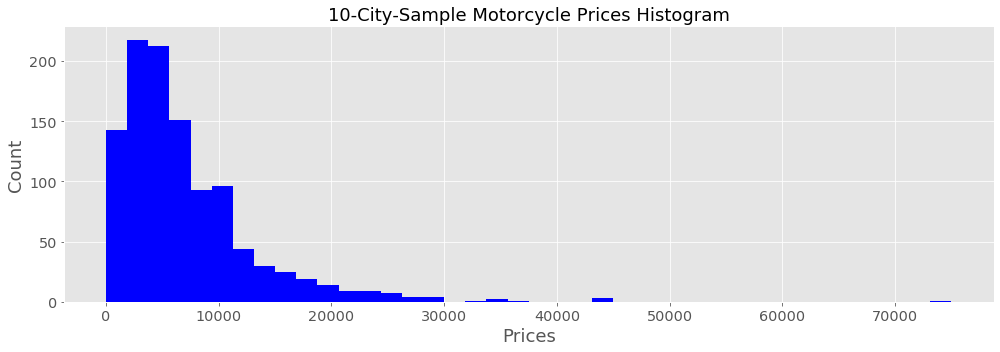

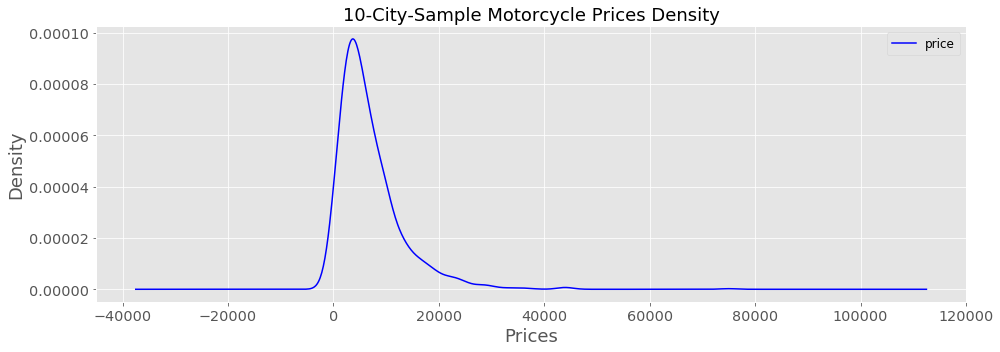

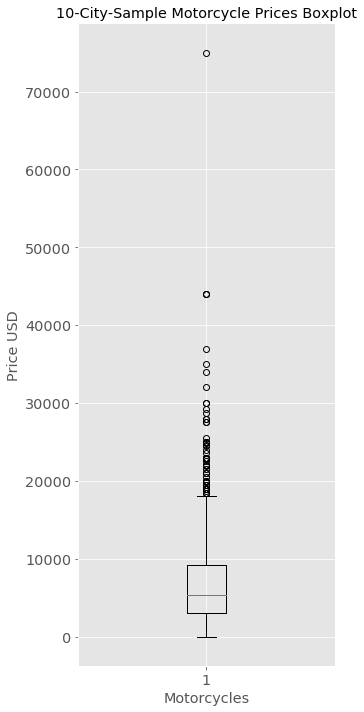

In [544]:
# Let's build some plots and view our price data with a different perspective

print(moto.describe())

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (14, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(moto_price, color = 'blue', bins = 40)
plt.xlabel("Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("10-City-Sample Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

params = {'figure.figsize': (8, 5)}
price=moto['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("10-City-Sample Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
price_boxplot = moto_price.array
plt.boxplot(price_boxplot)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("10-City-Sample Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

In [545]:
# save the clean data
moto.to_csv("craigslist_10_city_motorcycles_8APR2020.csv", index=False)    

In [379]:
x = -10
y = -1
post_timing[x:y], post_hoods[x:y], post_title_texts[x:y], post_links[x:y], post_prices[x:y], city_name[x:y] 

([], [], [], [], [], [])

In [555]:
moto.describe()

,price
count,1087.000000
mean,6990.724011
std,6313.514772
min,0.000000
25%,2999.000000
50%,5288.000000
75%,9150.000000
max,75000.000000


In [558]:
moto.head()

,posted,neighborhood,post title,URL,price,city
0,2020-04-07 19:15:00,(Round Rock,2005 Yamaha Midnight Venture,https://austin.craigslist.org/mcy/d/round-rock...,4400.0,Austin
1,2020-04-07 18:41:00,(Pflugerville,HARLEY PROJECT (MECHANIC) BIKE FOR SALE,https://austin.craigslist.org/mcy/d/round-rock...,2800.0,Austin
2,2020-04-07 16:43:00,(South Austin,2009 KTM 200 XC,https://austin.craigslist.org/mcy/d/austin-200...,2500.0,Austin
3,2020-04-07 15:58:00,(Wimberley,Ducati 2012 Monster 696 ABS Price Reduced,https://austin.craigslist.org/mcy/d/wimberley-...,4200.0,Austin
4,2020-04-07 15:13:00,(Elgin,Motorcycle,https://austin.craigslist.org/mcy/d/elgin-moto...,11000.0,Austin


In [556]:
moto.tail()

,posted,neighborhood,post title,URL,price,city
118,2020-03-31 17:58:00,(Knoxville,2020 Honda CRF 450R SKU:301379 Single-Cylinder...,https://knoxville.craigslist.org/mcd/d/knoxvil...,9399.0,Knoxville
119,2020-03-31 17:53:00,(Knoxville,2020 Honda CRF 450R SKU:301379 Single-Cylinder...,https://knoxville.craigslist.org/mcd/d/knoxvil...,9399.0,Knoxville
120,2020-03-31 17:42:00,(Knoxville,2020 Honda CRF125F SKU:201462 Single-Cylinder ...,https://knoxville.craigslist.org/mcd/d/knoxvil...,3099.0,Knoxville
121,2020-03-31 17:33:00,(Knoxville,2020 Suzuki DR-Z 400SM SKU:101129 Single-Cylin...,https://knoxville.craigslist.org/mcd/d/knoxvil...,7399.0,Knoxville
122,2020-03-31 17:22:00,(Knoxville,2019 Honda XR 650L SKU:700431 Single-Cylinder ...,https://knoxville.craigslist.org/mcd/d/knoxvil...,6999.0,Knoxville


In [583]:
moto.drop_duplicates()


,posted,neighborhood,post title,URL,price,city
0,2020-04-07 19:15:00,(Round Rock,2005 Yamaha Midnight Venture,https://austin.craigslist.org/mcy/d/round-rock...,4400.0,Austin
1,2020-04-07 18:41:00,(Pflugerville,HARLEY PROJECT (MECHANIC) BIKE FOR SALE,https://austin.craigslist.org/mcy/d/round-rock...,2800.0,Austin
2,2020-04-07 16:43:00,(South Austin,2009 KTM 200 XC,https://austin.craigslist.org/mcy/d/austin-200...,2500.0,Austin
3,2020-04-07 15:58:00,(Wimberley,Ducati 2012 Monster 696 ABS Price Reduced,https://austin.craigslist.org/mcy/d/wimberley-...,4200.0,Austin
4,2020-04-07 15:13:00,(Elgin,Motorcycle,https://austin.craigslist.org/mcy/d/elgin-moto...,11000.0,Austin
...,...,...,...,...,...,...
118,2020-03-31 17:58:00,(Knoxville,2020 Honda CRF 450R SKU:301379 Single-Cylinder...,https://knoxville.craigslist.org/mcd/d/knoxvil...,9399.0,Knoxville
119,2020-03-31 17:53:00,(Knoxville,2020 Honda CRF 450R SKU:301379 Single-Cylinder...,https://knoxville.craigslist.org/mcd/d/knoxvil...,9399.0,Knoxville
120,2020-03-31 17:42:00,(Knoxville,2020 Honda CRF125F SKU:201462 Single-Cylinder ...,https://knoxville.craigslist.org/mcd/d/knoxvil...,3099.0,Knoxville
121,2020-03-31 17:33:00,(Knoxville,2020 Suzuki DR-Z 400SM SKU:101129 Single-Cylin...,https://knoxville.craigslist.org/mcd/d/knoxvil...,7399.0,Knoxville


In [580]:
len(moto)

1087

,posted,neighborhood,post title,URL,price,city
45,2020-04-07 06:03:00,(Check Out Our Used Inventory Showroom!,2019 Harley-Davidson FLHTKSE - CVO Limited,https://losangeles.craigslist.org/lgb/mcd/d/sa...,36999.0,Los Angeles
101,2020-04-05 05:05:00,(Delivered To Your Doorstep Starting At $189,"2005 MV Agusta F4 Tambourini, New Unregistered...",https://chicago.craigslist.org/chc/mcd/d/las-v...,34995.0,Chicago
108,2020-03-31 13:04:00,"(Westport , Ct",1925 Henderson Deluxe Motorcycle,https://newyork.craigslist.org/fct/mcy/d/westp...,75000.0,New York City
48,2020-04-03 15:37:00,(Clinton Hwy Knoxville,2020 Vanderhall Venice GT (000045),https://knoxville.craigslist.org/mcd/d/knoxvil...,33950.0,Knoxville
51,2020-04-03 15:29:00,(Clinton Hwy Knoxville,2020 Vanderhall Carmel GT (000090),https://knoxville.craigslist.org/mcd/d/knoxvil...,43950.0,Knoxville
52,2020-04-03 15:26:00,(Clinton Hwy Knoxville,2020 Vanderhall Carmel GT (000069),https://knoxville.craigslist.org/mcd/d/knoxvil...,43950.0,Knoxville
53,2020-04-03 15:24:00,(Clinton Hwy Knoxville,2020 Vanderhall Carmel GT (000056),https://knoxville.craigslist.org/mcd/d/knoxvil...,43950.0,Knoxville


In [ ]:
# There are more duplicates here within the post titles. I thought removing the 
# duplicate URLs would fix this, but I see here that post titles are duplicated.
# 

In [605]:
moto = moto.drop_duplicates(subset=['post title'], keep=False)

In [601]:
len(moto)

971

In [609]:
# That dropped a little over 100 from our data frame. On hindsight I would have
# been more selective with this drop to account for user error in double posting 
# when they probably wanted to update an older instance. I would have done this
# by deduplicating those with the latest dates first. I have time I will come back and 
# fix this.

              price
count    971.000000
mean    7078.060762
std     6417.701851
min        0.000000
25%     3000.000000
50%     5200.000000
75%     9495.000000
max    75000.000000


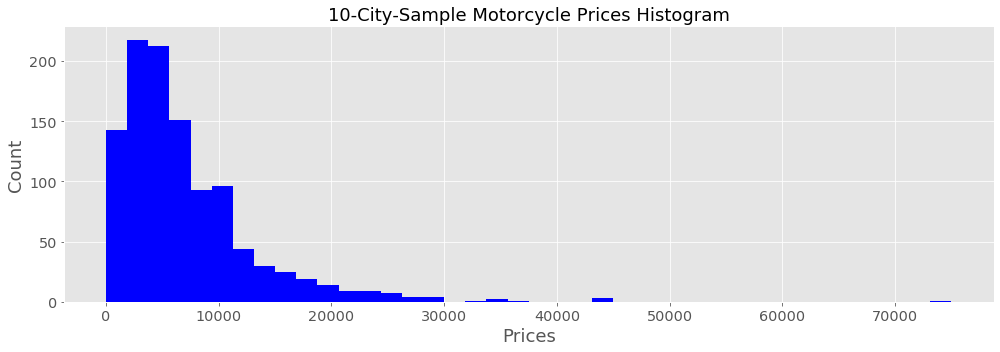

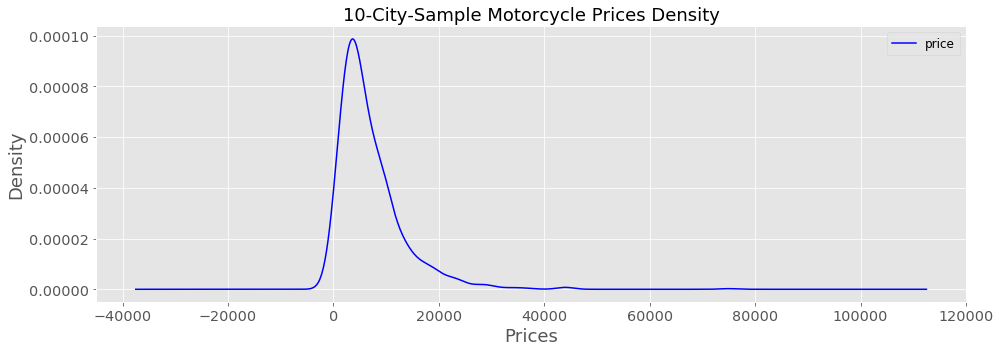

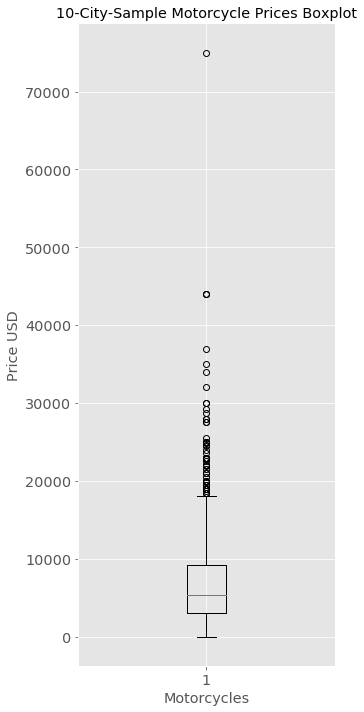

In [610]:
# Let's go back and take a look to see if this affected our plots any.

# Let's build some plots and view our price data with a different perspective

print(moto.describe())

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (14, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(moto_price, color = 'blue', bins = 40)
plt.xlabel("Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("10-City-Sample Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

params = {'figure.figsize': (8, 5)}
price=moto['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("10-City-Sample Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
price_boxplot = moto_price.array
plt.boxplot(price_boxplot)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("10-City-Sample Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

In [ ]:
# Our mean has gone up, but our distributions look generally the same. This shouldn't
# effect our distribution comparisons. However, I am very interested in these outliers
# Let's explore a little further to see what could be happening here.

In [ ]:
# I calculated the mean price plus three standard deviations to find what listings are
# above 99.5% of our results.

In [622]:
(np.mean(moto['price']) + ( 3 * np.std(moto['price'])))

26321.249701325774

In [620]:
(moto[moto['price'] > (np.mean(moto['price']) + ( 3 * np.std(moto['price'])))])

,posted,neighborhood,post title,URL,price,city
9,2020-04-07 12:27:00,(Mission City Indian Motorcycle,2020 Indian Challenger Dark Horse Thunder Blac...,https://austin.craigslist.org/mcd/d/boerne-202...,27499.0,Austin
89,2020-04-03 12:02:00,(Mission City Indian Motorcycle,2020 Indian Challenger Limited Thunder Black P...,https://austin.craigslist.org/mcd/d/boerne-202...,27999.0,Austin
56,2020-04-05 19:31:00,(Atlanta,"Star Racing, Street|Race Roadglide",https://atlanta.craigslist.org/atl/mcy/d/fayet...,28000.0,Atlanta
57,2020-04-05 19:27:00,(Atlanta,Star Racing Harley Davidson Street|Race Roadking,https://atlanta.craigslist.org/atl/mcy/d/atlan...,32000.0,Atlanta
45,2020-04-07 06:03:00,(Check Out Our Used Inventory Showroom!,2019 Harley-Davidson FLHTKSE - CVO Limited,https://losangeles.craigslist.org/lgb/mcd/d/sa...,36999.0,Los Angeles
12,2020-04-07 17:47:00,(Bremerton Wa - Brothers Powersports,2020 Indian Motorcycle Challenger Limited Deep...,https://seattle.craigslist.org/kit/mcd/d/breme...,28749.0,Seattle
13,2020-04-07 17:23:00,(Bremerton Wa - Brothers Powersports,2020 Indian Motorcycle Challenger Dark Horse T...,https://seattle.craigslist.org/kit/mcd/d/breme...,27499.0,Seattle
101,2020-04-05 05:05:00,(Delivered To Your Doorstep Starting At $189,"2005 MV Agusta F4 Tambourini, New Unregistered...",https://chicago.craigslist.org/chc/mcd/d/las-v...,34995.0,Chicago
108,2020-03-31 13:04:00,"(Westport , Ct",1925 Henderson Deluxe Motorcycle,https://newyork.craigslist.org/fct/mcy/d/westp...,75000.0,New York City
48,2020-04-03 15:37:00,(Clinton Hwy Knoxville,2020 Vanderhall Venice GT (000045),https://knoxville.craigslist.org/mcd/d/knoxvil...,33950.0,Knoxville


In [ ]:
# It seems that many of these are new motorcycles on the lot, classic motorcycles, and 
# a few are trikes that could be classified as non-motorcycles. I want to remove them,
# but that is a personal preference and not reflective of the data. To be a good data
# scientist I am going to practice some discipline and be data agnostic. So instead of 
# getting into the pub argument about what qualifies a motorcycle I am going to let
# let the market be the decider. It's in the market so people are qualifying it as a
# motorcycle. I still don't like how much more expensive they generally are, and believe
# there is enough credibility here to say they're in a different group so I'm going to
# one more standard deviation higher to see what the data looks like.

In [623]:
(np.mean(moto['price']) + ( 4 * np.std(moto['price'])))

32735.64601440072

In [621]:
(moto[moto['price'] > (np.mean(moto['price']) + ( 4 * np.std(moto['price'])))])

,posted,neighborhood,post title,URL,price,city
45,2020-04-07 06:03:00,(Check Out Our Used Inventory Showroom!,2019 Harley-Davidson FLHTKSE - CVO Limited,https://losangeles.craigslist.org/lgb/mcd/d/sa...,36999.0,Los Angeles
101,2020-04-05 05:05:00,(Delivered To Your Doorstep Starting At $189,"2005 MV Agusta F4 Tambourini, New Unregistered...",https://chicago.craigslist.org/chc/mcd/d/las-v...,34995.0,Chicago
108,2020-03-31 13:04:00,"(Westport , Ct",1925 Henderson Deluxe Motorcycle,https://newyork.craigslist.org/fct/mcy/d/westp...,75000.0,New York City
48,2020-04-03 15:37:00,(Clinton Hwy Knoxville,2020 Vanderhall Venice GT (000045),https://knoxville.craigslist.org/mcd/d/knoxvil...,33950.0,Knoxville
51,2020-04-03 15:29:00,(Clinton Hwy Knoxville,2020 Vanderhall Carmel GT (000090),https://knoxville.craigslist.org/mcd/d/knoxvil...,43950.0,Knoxville
52,2020-04-03 15:26:00,(Clinton Hwy Knoxville,2020 Vanderhall Carmel GT (000069),https://knoxville.craigslist.org/mcd/d/knoxvil...,43950.0,Knoxville
53,2020-04-03 15:24:00,(Clinton Hwy Knoxville,2020 Vanderhall Carmel GT (000056),https://knoxville.craigslist.org/mcd/d/knoxvil...,43950.0,Knoxville


In [ ]:
# This looks more akin to a group I'm comfortable kicking out. If I did some cluster
# analysis I bet those trikes would self select themselves out, but in the meantime I
# feel comfortable getting rid of all outliers greater than 4 standard deviations
# away from the mean. 

In [ ]:
moto = moto.drop((np.mean(moto['price']) + ( 4 * np.std(moto['price']))))